# 0.0 Imports

In [578]:
import inflection
import datetime
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 0.1 Help Functions

In [543]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [544]:
def quadro_estatistico_descritivo (numerical_attributes):
    # Medidas de Tendencia Central - Media e Mediana
    media = pd.DataFrame(numerical_attributes.apply(np.mean)).T
    mediana = pd.DataFrame(numerical_attributes.apply(np.median)).T

    # Medidas de Disperção - (Desvio Padrão)std, min, max, (Tamanho)range, (Amplitude)skew, kurtosis
    desvio_padrao = pd.DataFrame(numerical_attributes.apply(np.std)).T
    mínimo = pd.DataFrame(numerical_attributes.apply(min)).T
    máximo = pd.DataFrame(numerical_attributes.apply(max)).T
    distancia = pd.DataFrame(numerical_attributes.apply(lambda x: x.max() - x.min())).T
    assimetria = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew())).T
    curtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis())).T

    # concat
    estatistica = pd.concat( [mínimo, máximo, distancia, media, mediana, desvio_padrao, assimetria, curtosis] ).T.reset_index()
    estatistica.columns = ['atributes', 'mínimo', 'máximo', 'distancia', 'media', 'mediana', 'desvio_padrao', 'assimetria', 'curtosis']
    return estatistica

In [545]:
def var_categorico_valores_unicos(categorical_attributes):
    for i in categorical_attributes:
        print(f'Atributos: {i} - {categorical_attributes[i].sort_values().unique().tolist()}')

In [546]:
def ajuste_colunas(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

## 0.2 Import Data

In [547]:
data_raw = pd.read_csv('../src/data/raw/zomato.csv')
data_raw.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,Botswana Pula(P),1,0,0,0,3,4.60,3F7E00,Excellent,619
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,Botswana Pula(P),1,0,0,0,3,4.60,3F7E00,Excellent,619
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"European, Asian",...,Botswana Pula(P),0,0,0,0,4,4.70,3F7E00,Excellent,469
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"Filipino, American, Italian, Bakery",...,Botswana Pula(P),0,0,0,0,3,4.40,5BA829,Very Good,867
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,American,...,Botswana Pula(P),0,0,0,0,3,4.40,5BA829,Very Good,858


# 1.0 Exploration

In [548]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7527 non-null   int64  
 1   Restaurant Name       7527 non-null   object 
 2   Country Code          7527 non-null   int64  
 3   City                  7527 non-null   object 
 4   Address               7527 non-null   object 
 5   Locality              7527 non-null   object 
 6   Locality Verbose      7527 non-null   object 
 7   Longitude             7527 non-null   float64
 8   Latitude              7527 non-null   float64
 9   Cuisines              7512 non-null   object 
 10  Average Cost for two  7527 non-null   int64  
 11  Currency              7527 non-null   object 
 12  Has Table booking     7527 non-null   int64  
 13  Has Online delivery   7527 non-null   int64  
 14  Is delivering now     7527 non-null   int64  
 15  Switch to order menu 

## 1.1 Verificação de valores

In [549]:
numerical_attributes = data_raw.select_dtypes( include = ['int64', 'float64'] )
categorical_attributes = data_raw.select_dtypes( exclude = ['int64', 'float64'])

### 1.1.1 Verificação dos atributos numéricos

In [550]:
quadro_estatitico = quadro_estatistico_descritivo(numerical_attributes)
quadro_estatitico

,atributes,mínimo,máximo,distancia,media,mediana,desvio_padrao,assimetria,curtosis
0,Restaurant ID,549.00,19040277.00,19039728.00,10556892.00,7701457.00,7074671.13,-0.09,-1.73
1,Country Code,1.00,216.00,215.00,93.07,30.00,99.02,0.26,-1.85
2,Longitude,-122.70,175.31,298.01,33.76,73.79,77.39,-0.68,-0.60
3,Latitude,-41.33,55.98,97.31,19.33,25.25,23.25,-1.08,0.62
4,Average Cost for two,0.00,25000017.00,25000017.00,7152.11,290.00,290587.52,84.58,7271.93
5,Has Table booking,0.00,1.00,1.00,0.06,0.00,0.24,3.63,11.16
6,Has Online delivery,0.00,1.00,1.00,0.35,0.00,0.48,0.62,-1.62
7,Is delivering now,0.00,1.00,1.00,0.17,0.00,0.38,1.72,0.95
8,Switch to order menu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Price range,1.00,4.00,3.00,2.62,3.00,0.96,-0.04,-0.98


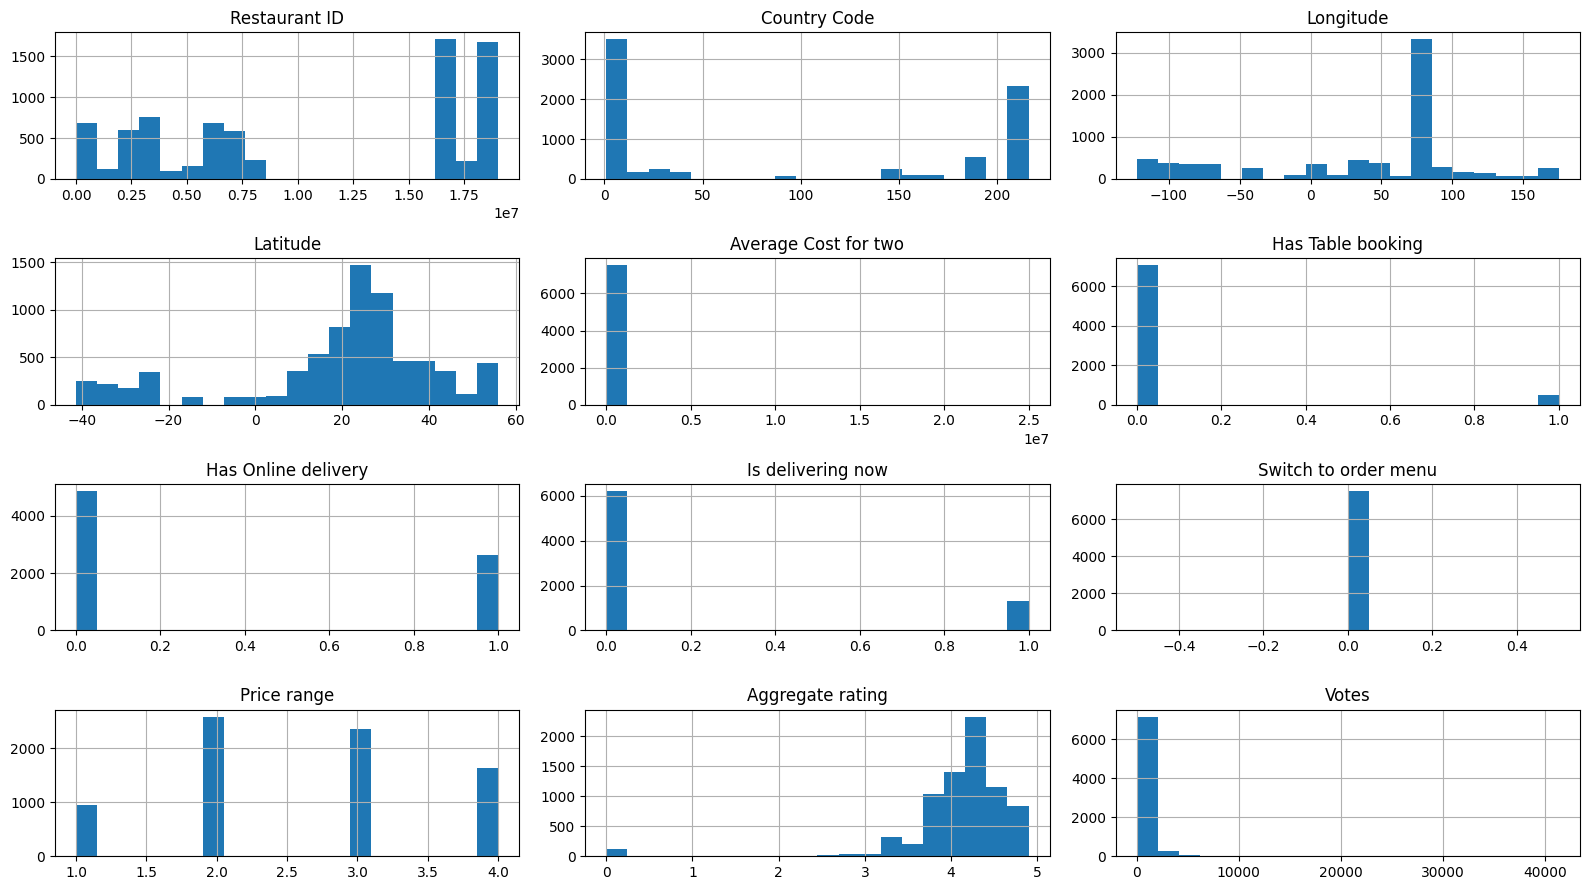

In [551]:
numerical_attributes.hist(figsize=(16,9), bins=20)
plt.tight_layout()

#### 1.1.1.1 Sugestão inicial de transformação nos atributos numéricos

Dados numéricos:
1. Restaurant ID: Sem necessidade de transformação
2. Country Code: Colocar em uma coluna auxiliar o nome dos países, com referência do country code.
3. Longitude: Sem necessidade de transformação
4. Longitude: Sem necessidade de transformação
5. Average Cost for two: Atualizar todos os valores monetários para um único valor. Há alguns outliers que podem ser só a variação deste valor monetário. Caso não seja variação do valor monetário, verificar outras hipóteses. Há uma única exceção que é o maior valor, no index[385] ele está em dollar e o valor é muito exorbitante
6. Has Table booking: Sem necessidade de transformação
7. Has Online delivery: Sem necessidade de transformação
8. Is delivering now: Sem necessidade de transformação
9. Switch to order menu: Sem necessidade de transformação
10. Price range: Sem necessidade de transformação
11. Aggregate rating: Sem necessidade de transformação
12. Votes: Sem necessidade de transformação

## 1.2 Verificação dos atributos categóricos

In [552]:
#categoricos = data_raw[['Cuisines']]
#valores_unicos_categoricos = var_categorico_valores_unicos(categoricos)
#valores_unicos_categoricos

Dados Categóricos:
1. Restaurant Name: Sem necessidade de transformação.
2. City: Sem necessidade de transformação.
3. Address: Sem necessidade de transformação.
4. Locality Verbose: Sem necessidade de transformação.
5. Cuisines: Possui vários valores distintos em uma única linha. Foi identificado que só precisamo da cosinha principal, que é a primeira cosinha
6. Currency: (Cada moeda, foi registrada com o seu valor local) Sem necessidade de transformação, a não ser que queira separa o nome do pais do formato da moeda.
7. Rating color: Modificar a cor de exadecimal para nome.
8. Rating text: Traduzir tudo para uma única lingua. Gerar uma classificação mais ordenada. Aplicar a classificação trocando os valores.

# 2.0 Aplicação de mudanças propostas

## 2.1 Mudanças nos atributos numéricos

### 2.1.1 Criação da coluna paises

In [553]:
# Criação do dataframe países para unir com data_raw
paises = { 'Country Code':[ 1, 14, 30, 37, 94, 148, 162, 166, 184, 189, 191, 208, 214, 215, 216],
              'Name Country':[ "India", "Australia", "Brazil", "Canada", "Indonesia", "New Zeland", "Philippines", "Qatar", "Singapure", "South Africa", "Sri Lanka", "Turkey", "United Arab Emirates", "England", "United States of America"]}
paises = pd.DataFrame(paises)
paises

,Country Code,Name Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zeland
6,162,Philippines
7,166,Qatar
8,184,Singapure
9,189,South Africa


In [554]:
# União entre os datafreames data_raw e países pela coluna "country code"
data_raw = data_raw.merge(paises, on='Country Code', how='inner')
data_raw.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,1,0,0,0,3,4.60,3F7E00,Excellent,619,Philippines
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,1,0,0,0,3,4.60,3F7E00,Excellent,619,Philippines
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"European, Asian",...,0,0,0,0,4,4.70,3F7E00,Excellent,469,Philippines
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"Filipino, American, Italian, Bakery",...,0,0,0,0,3,4.40,5BA829,Very Good,867,Philippines
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,American,...,0,0,0,0,3,4.40,5BA829,Very Good,858,Philippines


### 2.1.2 Melhora do entendimento nos valores relacionados ao Currency

In [555]:
# Verificação de outliers antes da mudança do currency
# Foram realizadas várias verificações afim de conhecer melhor os dados
data_raw.loc[(data_raw['Average Cost for two']>1000) & (data_raw['Currency'] == 'Rand(R)'),['Restaurant Name', 'City', 'Locality', 'Name Country','Currency','Average Cost for two']].sort_values(by='Average Cost for two',ascending=False)#.groupby('Name Country').count().reset_index()

,Restaurant Name,City,Locality,Name Country,Currency,Average Cost for two
7224,Restaurant Mosaic @ The Orient,Pretoria,West Park,South Africa,Rand(R),3210
6952,The Test Kitchen,Cape Town,"Old Biscuit Mill, Woodstock",South Africa,Rand(R),2800
7154,Fermier Restaurant,Pretoria,Die Wilgers,South Africa,Rand(R),1100


In [556]:
data_raw['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [557]:
# Criação do dataframe para conversão das moedas
conversao_moeda = {'Currency': ['Brazilian Real(R$)', 'Botswana Pula(P)', 'Dollar($)', 'Emirati Diram(AED)','Indian Rupees(Rs.)', 'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(£)', 'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)', 'Turkish Lira(TL)'],
                    'Indice de correcao': [1, 2.75, 0.2, 0.74, 16.83, 3117.62, 0.33, 0.16, 0.73, 3.80, 65.68, 5.50]}
conversao_moeda = pd.DataFrame(conversao_moeda)
conversao_moeda

,Currency,Indice de correcao
0,Brazilian Real(R$),1.00
1,Botswana Pula(P),2.75
2,Dollar($),0.20
3,Emirati Diram(AED),0.74
4,Indian Rupees(Rs.),16.83
5,Indonesian Rupiah(IDR),3117.62
6,NewZealand($),0.33
7,Pounds(£),0.16
8,Qatari Rial(QR),0.73
9,Rand(R),3.80


In [558]:
# União entre os datafreames data_raw e países pela coluna "country code"
data_raw = data_raw.merge(conversao_moeda, on='Currency', how='inner')
data_raw.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country,Indice de correcao
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,0,0,0,3,4.60,3F7E00,Excellent,619,Philippines,2.75
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Italian,...,0,0,0,3,4.60,3F7E00,Excellent,619,Philippines,2.75
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"European, Asian",...,0,0,0,4,4.70,3F7E00,Excellent,469,Philippines,2.75
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,"Filipino, American, Italian, Bakery",...,0,0,0,3,4.40,5BA829,Very Good,867,Philippines,2.75
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,American,...,0,0,0,3,4.40,5BA829,Very Good,858,Philippines,2.75
5,6304833,Manam,162,Makati City,"Level 1, Greenbelt 2, Ayala Center, Greenbelt,...","Greenbelt 2, San Lorenzo, Makati City","Greenbelt 2, San Lorenzo, Makati City, Makati ...",121.02,14.55,Filipino,...,0,0,0,3,4.70,3F7E00,Excellent,930,Philippines,2.75
6,18409457,Soban K-Town Grill,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,"Korean, Grill",...,0,0,0,3,4.70,3F7E00,Excellent,935,Philippines,2.75
7,18607559,Bluesmith Coffee & Kitchen,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,"American, Filipino, Coffee",...,0,0,0,3,4.00,5BA829,Very Good,340,Philippines,2.75
8,6314001,Motorino Pizzeria Napoletana,162,Makati City,"Level 2, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,"Pizza, Italian",...,1,1,0,3,4.30,5BA829,Very Good,449,Philippines,2.75
9,18189398,Shi Lin,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,Taiwanese,...,1,0,0,3,4.10,5BA829,Very Good,201,Philippines,2.75


In [559]:
# Calculo para a correção dos dados
data_raw['Custo para dois corrigido'] = data_raw.apply(lambda x : x['Average Cost for two'] / x['Indice de correcao'], axis =1)
data_raw[['Custo para dois corrigido']]

,Custo para dois corrigido
0,400.00
1,400.00
2,1127.27
3,290.91
4,254.55
...,...
7522,54.55
7523,8.18
7524,25.45
7525,17.27


In [560]:
# Remoção do outlier que realmente estava bem fora do padrão.
# Considero que todos os outros valoes estão em um padrão aceitável, até porque existem restaurantes que conseguimos
# gastas muito dinheiro. 
data_raw = data_raw.loc[(data_raw['Custo para dois corrigido'] < 10000),:]
data_raw.shape

(7526, 24)

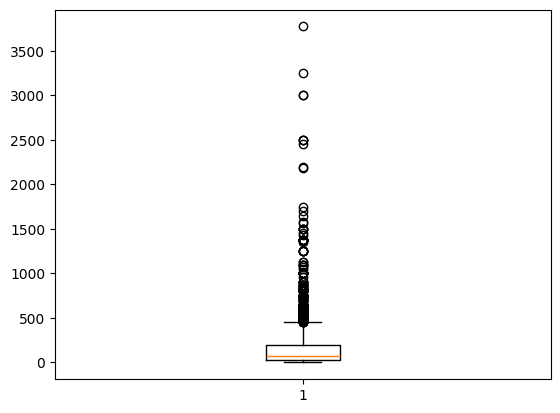

In [561]:
# Verificação dos outliers
plt.boxplot(data_raw['Custo para dois corrigido']);

### 2.1.3 Nova tabela Estatística

In [562]:
# Nova verificação do quadro estatístico
numerical_attributes = data_raw.select_dtypes( include = ['int64', 'float64'] )

In [563]:
quadro_estatitico = quadro_estatistico_descritivo(numerical_attributes)
quadro_estatitico

,atributes,mínimo,máximo,distancia,media,mediana,desvio_padrao,assimetria,curtosis
0,Restaurant ID,549.00,19040277.00,19039728.00,10556087.96,7701456.00,7074797.24,-0.09,-1.73
1,Country Code,1.00,216.00,215.00,93.08,30.00,99.03,0.26,-1.85
2,Longitude,-122.70,175.31,298.01,33.75,73.78,77.39,-0.68,-0.60
3,Latitude,-41.33,55.98,97.31,19.34,25.25,23.25,-1.08,0.62
4,Average Cost for two,0.00,1200000.00,1200000.00,3831.24,290.00,37990.19,15.99,350.17
5,Has Table booking,0.00,1.00,1.00,0.06,0.00,0.24,3.63,11.19
6,Has Online delivery,0.00,1.00,1.00,0.35,0.00,0.48,0.62,-1.62
7,Is delivering now,0.00,1.00,1.00,0.17,0.00,0.38,1.72,0.95
8,Switch to order menu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Price range,1.00,4.00,3.00,2.62,3.00,0.96,-0.04,-0.98


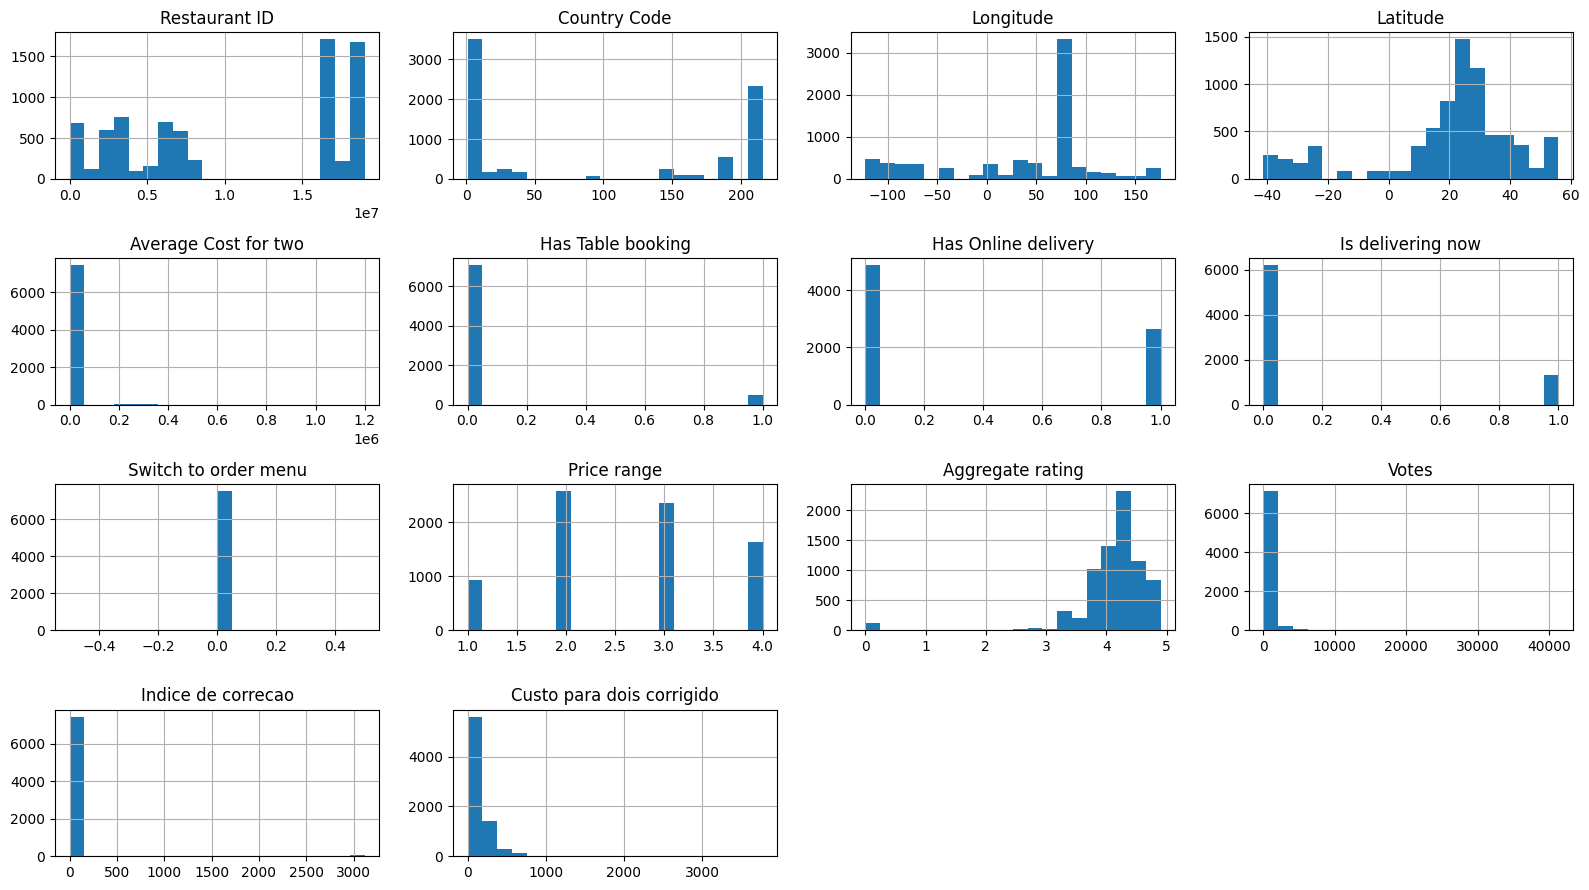

In [564]:
numerical_attributes.hist(figsize=(16,9), bins=20)
plt.tight_layout()

### 2.1.4 Retirar colunas

Podemos retirar as colunas:
1. Average Cost for two: Já foi feito a correção para um valor padrão
2. Switch to order menu: Não há outros valores além de 0. Caso seja preciso é só criar uma coluna = 0.0
3. Indice de correcao: Já foi utilizado e não irei precisar mais dele

In [565]:
colunas_numerica_drop = ['Average Cost for two', 'Switch to order menu', 'Indice de correcao']
data_raw = data_raw.drop( columns = colunas_numerica_drop)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7526 entries, 0 to 7526
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Restaurant ID              7526 non-null   int64  
 1   Restaurant Name            7526 non-null   object 
 2   Country Code               7526 non-null   int64  
 3   City                       7526 non-null   object 
 4   Address                    7526 non-null   object 
 5   Locality                   7526 non-null   object 
 6   Locality Verbose           7526 non-null   object 
 7   Longitude                  7526 non-null   float64
 8   Latitude                   7526 non-null   float64
 9   Cuisines                   7511 non-null   object 
 10  Currency                   7526 non-null   object 
 11  Has Table booking          7526 non-null   int64  
 12  Has Online delivery        7526 non-null   int64  
 13  Is delivering now          7526 non-null   int64  
 1

## 2.2 Mudança nos atributos categóricos

### 2.2.1 Mudança do atributo rating text

In [566]:
# A escala utilizada será -> Não avaliado, Ruim, Normal, Bom, Muito Bom, Excelente
mudanca_rating_text = {
    'Rating text': ['Average', 'Baik', 'Bardzo dobrze', 'Biasa', 'Bom', 'Bueno', 'Buono', 'Eccellente', 'Excelente', 'Excellent', 'Good', 'Harika', 'Muito Bom', 'Muito bom', 'Muy Bueno', 'Not rated', 'Poor', 'Sangat Baik', 'Skvělá volba', 'Skvělé', 'Terbaik', 'Velmi dobré', 'Very Good', 'Veľmi dobré', 'Vynikajúce', 'Wybitnie', 'Çok iyi', 'İyi'],
    'Avalicao texto': ['Normal', 'Bom', 'Muito bom', 'Normal', 'Bom', 'Bom', 'Bom', 'Excelente', 'Excelente', 'Excelente', 'Bom', 'Muito Bom', 'Muito Bom', 'Muito Bom', 'Muito Bom', 'Não Avaliado', 'Ruim', 'Muito Bom', 'Excelente', 'Muito Bom', 'Excelente', 'Muito Bom', 'Muito Bom', 'Muito Bom', 'Excelente', 'Excelente', 'Muito Bom', 'Bom']
}
mudanca_rating_text = pd.DataFrame(mudanca_rating_text)
mudanca_rating_text

,Rating text,Avalicao texto
0,Average,Normal
1,Baik,Bom
2,Bardzo dobrze,Muito bom
3,Biasa,Normal
4,Bom,Bom
5,Bueno,Bom
6,Buono,Bom
7,Eccellente,Excelente
8,Excelente,Excelente
9,Excellent,Excelente


In [567]:
# União entre os datafreames data_raw e mudanca_rating_text pela coluna "Rating text"
data_raw = data_raw.merge(mudanca_rating_text, on='Rating text', how='inner')
data_raw.sample(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country,Custo para dois corrigido,Avalicao texto
5542,5800229,Tsing Tao,191,Colombo,"Race Course Promenade, Reid Avenue, Cinnamon G...",Race Course Promenade,"Race Course Promenade, Colombo",79.86,6.91,"Chinese, Seafood",...,0,0,4,4.10,5BA829,Very Good,111,Sri Lanka,60.90,Muito Bom
5063,6900224,Chaophraya,215,Birmingham,"Middle Mall, Bullring Shopping Centre, Special...","Bullring Shopping Centre, Southside","Bullring Shopping Centre, Southside, Birmingham",-1.89,52.48,Thai,...,0,0,2,4.00,5BA829,Very Good,19,England,187.50,Muito Bom
1780,6113973,Bone Daddies,215,London,"31 St. Peter Street, Soho, London W1F 0AR","Walker's Court, Soho","Walker's Court, Soho, London",-0.13,51.51,"Ramen, Japanese",...,0,0,3,4.70,3F7E00,Excellent,421,England,250.00,Excelente
872,18483051,Summer Pavilion,184,Singapore,"The Ritz-Carlton, 7 Raffles Avenue, Millenia ...","Marina Centre, Downtown Core","Marina Centre, Downtown Core, Singapore",103.86,1.29,"Chinese, Seafood, Cantonese, Dim Sum",...,0,0,4,4.80,3F7E00,Excellent,28,Singapure,1500.00,Excelente
2961,16663494,The Works,37,Ottawa,"326 Richmond Road, Ottawa K1Z 6X6",Westboro,"Westboro, Ottawa",-75.75,45.39,"Burger, Vegetarian",...,0,0,4,4.30,5BA829,Very Good,399,Canada,250.00,Muito Bom
6918,7302357,Café das Estrelas,30,Rio de Janeiro,"Observatório Nacional, Rua General José Cristi...",São Cristóvão,"São Cristóvão, Rio de Janeiro",-43.22,-22.90,Brazilian,...,0,0,1,3.00,CDD614,Average,4,Brazil,25.00,Normal
7481,2400459,Chicago Pizza,1,Allahabad,"Vinayak City Square, Sardar Patel Marg, Parade...",Civil Lines,"Civil Lines, Allahabad",81.84,25.45,"Pizza, Beverages",...,1,0,2,4.10,5BA829,Velmi dobré,334,India,23.77,Muito Bom
15,18594729,Nikkei,162,Mandaluyong City,"Ground Floor, The Podium, ADB Avenue, Ortigas,...","The Podium, Ortigas, Mandaluyong City","The Podium, Ortigas, Mandaluyong City, Mandalu...",121.06,14.58,"Japanese, Latin American",...,0,0,4,4.80,3F7E00,Excellent,312,Philippines,581.82,Excelente
7263,6400199,Quay 4 Tavern,189,Cape Town,"4 West Quay Road, V & A Waterfront, Cape Town",V & A Waterfront,"V & A Waterfront, Cape Town",18.42,-33.91,"Seafood, Burger, South African, Desserts, Gril...",...,0,0,4,2.90,FFBA00,Average,304,South Africa,78.95,Normal
4886,18306045,Percolator Coffee House,1,Vizag,"RK Beach, Maharani Peta, Vizag Visakhapatnam.,...",Maharani Peta,"Maharani Peta, Vizag",83.32,17.71,"Mughlai, Chinese, Cafe, BBQ",...,1,1,2,4.00,5BA829,Very Good,318,India,29.71,Muito Bom


### 2.2.2 Mundaça do atribulo Cuisines

In [568]:
data_raw["Cuisines"].fillna('Cozinha não encontrada', inplace=True)
data_raw[data_raw['Cuisines'].isna()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Name Country,Custo para dois corrigido,Avalicao texto


In [569]:
data_raw["cuisines"] = data_raw.loc[:, "Cuisines"].apply(lambda x: x.split(",")[0])

In [570]:
data_raw["cuisines"]

0               Italian
1               Italian
2              European
3              Filipino
4                Korean
             ...       
7521               Cafe
7522           Japanese
7523              Grill
7524    Restaurant Cafe
7525      World Cuisine
Name: cuisines, Length: 7526, dtype: object

### 2.2.3 Mudança do atributo Rating color

In [571]:
cores_hex = {"Rating color": ["3F7E00", "5BA829", "9ACD32", "CDD614", "FFBA00", "CBCBC8", "FF7800"],
             "Nome cor": ["Verde Escuro", "Verde", "Verde Claro", "Laranja", "Vermelho", "Cinza Claro", "Vermelho Escuro"]}
cores_hex = pd.DataFrame(cores_hex)
cores_hex

,Rating color,Nome cor
0,3F7E00,Verde Escuro
1,5BA829,Verde
2,9ACD32,Verde Claro
3,CDD614,Laranja
4,FFBA00,Vermelho
5,CBCBC8,Cinza Claro
6,FF7800,Vermelho Escuro


In [572]:
data_raw = data_raw.merge(cores_hex, on='Rating color', how='inner')

### 2.2.4 Retirar colunas

In [574]:
colunas_categoricas_drop = ['Cuisines', 'Rating color', 'Rating text']
data_raw = data_raw.drop( columns = colunas_categoricas_drop)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7526 entries, 0 to 7525
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Restaurant ID              7526 non-null   int64  
 1   Restaurant Name            7526 non-null   object 
 2   Country Code               7526 non-null   int64  
 3   City                       7526 non-null   object 
 4   Address                    7526 non-null   object 
 5   Locality                   7526 non-null   object 
 6   Locality Verbose           7526 non-null   object 
 7   Longitude                  7526 non-null   float64
 8   Latitude                   7526 non-null   float64
 9   Currency                   7526 non-null   object 
 10  Has Table booking          7526 non-null   int64  
 11  Has Online delivery        7526 non-null   int64  
 12  Is delivering now          7526 non-null   int64  
 13  Price range                7526 non-null   int64

## 2.3 Ajuste das colunas

In [575]:
data_raw = ajuste_colunas(data_raw)
data_raw

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,currency,...,has_online_delivery,is_delivering_now,price_range,aggregate_rating,votes,name_country,custo_para_dois_corrigido,avalicao_texto,cuisines,nome_cor
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Botswana Pula(P),...,0,0,3,4.60,619,Philippines,400.00,Excelente,Italian,Verde Escuro
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.01,14.45,Botswana Pula(P),...,0,0,3,4.60,619,Philippines,400.00,Excelente,Italian,Verde Escuro
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.02,14.56,Botswana Pula(P),...,0,0,4,4.70,469,Philippines,1127.27,Excelente,European,Verde Escuro
3,6304833,Manam,162,Makati City,"Level 1, Greenbelt 2, Ayala Center, Greenbelt,...","Greenbelt 2, San Lorenzo, Makati City","Greenbelt 2, San Lorenzo, Makati City, Makati ...",121.02,14.55,Botswana Pula(P),...,0,0,3,4.70,930,Philippines,254.55,Excelente,Filipino,Verde Escuro
4,18409457,Soban K-Town Grill,162,Makati City,"Level 3, Greenbelt 3, Ayala Center, Greenbelt,...","Greenbelt 3, San Lorenzo, Makati City","Greenbelt 3, San Lorenzo, Makati City, Makati ...",121.02,14.55,Botswana Pula(P),...,0,0,3,4.70,935,Philippines,472.73,Excelente,Korean,Verde Escuro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7521,7800435,Moyo,189,Durban,"1 Bell Street, uShaka Marine World, Point, Dur...",Durban Central,"Durban Central, Durban",31.05,-29.87,Rand(R),...,0,0,4,2.20,110,South Africa,118.42,Ruim,African,Vermelho Escuro
7522,18445965,Guy Fieri's Kitchen & Bar,189,Pretoria,"Time Square Casino, 209 Aramist Avenue, Menlyn...",Time Square Casino,"Time Square Casino, Pretoria",28.28,25.79,Rand(R),...,0,0,4,2.20,183,South Africa,118.42,Ruim,American,Vermelho Escuro
7523,18445965,Guy Fieri's Kitchen & Bar,189,Pretoria,"Time Square Casino, 209 Aramist Avenue, Menlyn...",Time Square Casino,"Time Square Casino, Pretoria",28.28,25.79,Rand(R),...,0,0,4,2.20,183,South Africa,118.42,Ruim,American,Vermelho Escuro
7524,18279085,Bliss lounge,191,Colombo,"9, R.A De Mel Mawatha, Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04","Bambalapitiya, Colombo 04, Colombo",79.86,6.89,Sri Lankan Rupee(LKR),...,0,0,3,2.30,62,Sri Lanka,38.06,Ruim,Asian,Vermelho Escuro


# 3.0 Exportar dataframe limpo

In [579]:
pickle.dump(data_raw,open('../src/data/processed/df01.pkl','wb'))